In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# New York Stock Exchange average monthly returns [1961-1966] from curriculum
nyse = pd.read_csv("NYSE_monthly.csv")
col_name= 'Month'
nyse[col_name] = pd.to_datetime(nyse[col_name])
nyse.set_index(col_name, inplace=True)

In [5]:
# Generated data 
years = pd.date_range('2012-01', periods=72, freq="M")
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])

data = pd.Series(sales+bigger+6, index=index)
ts = data

# Types of Trends

## Stationary

### Definition:
> images from [https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)

- The series' **mean** is **not** a function of time
![https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png](images/Mean_nonstationary.png)

- The series' **varaince** is **not** a function of time (heteroscedacity)
![https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png](images/Var_nonstationary.png)

- The series' **covaraince** is **not** a function of time
![https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png](images/Cov_nonstationary.png)

### No Trend

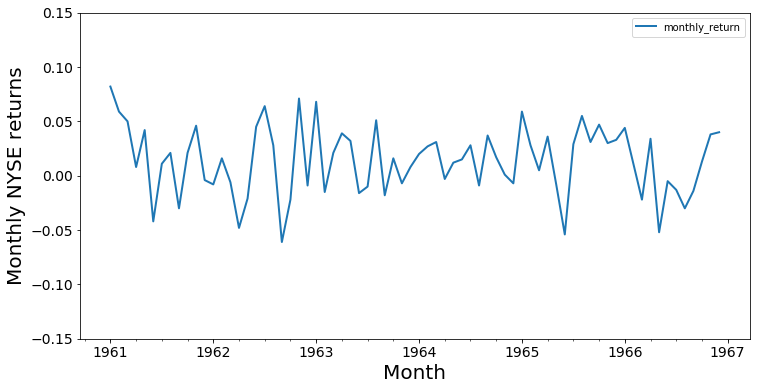

In [3]:
data = nyse
data.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel(col_name, fontsize=20)
plt.ylabel("Monthly NYSE returns", fontsize=20)
plt.ylim((-0.15,0.15));

## Linear Trend

### Upward

![](https://github.com/learn-co-students/dsc-3-25-05-types-of-trends-online-ds-sp-000/raw/master/index_files/index_15_0.png)

### Downward

![](https://github.com/learn-co-students/dsc-3-25-05-types-of-trends-online-ds-sp-000/raw/master/index_files/index_19_0.png)

## Exponential

![](https://github.com/learn-co-students/dsc-3-25-05-types-of-trends-online-ds-sp-000/raw/master/index_files/index_22_0.png)

## Periodic

![](https://github.com/learn-co-students/dsc-3-25-05-types-of-trends-online-ds-sp-000/raw/master/index_files/index_25_0.png)

![](https://github.com/learn-co-students/dsc-3-25-05-types-of-trends-online-ds-sp-000/raw/master/index_files/index_30_0.png)

# Assessing Trends 

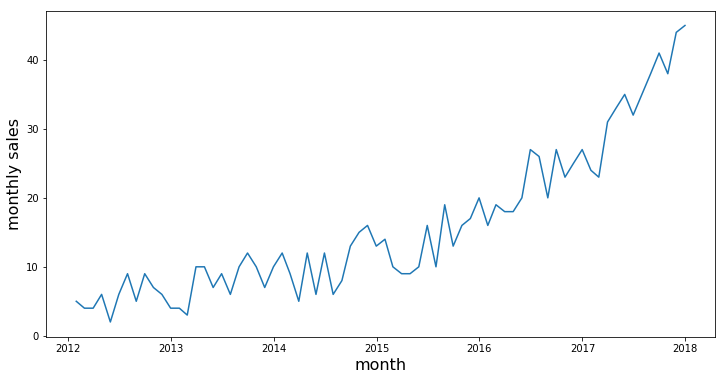

In [6]:
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel("month", fontsize=16)
plt.ylabel("monthly sales", fontsize=16)
plt.show()

## Rolling Statistics

Take the average of a number of past data points (over a time period)

### Example

In [ ]:
rolmean = ts.rolling(window = 8, center = False).mean()
rolstd = ts.rolling(window = 8, center = False).std()

fig = plt.figure(figsize=(12,7))
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Dickey-Fuller Test

Statistical test for testing stationarity; $H_0$ is that time series is stationary

Doc Resource: http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

### Code Example

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

In [ ]:
print(dfoutput)

# Removing Trends

Goal is to make the time series stationary to use most modeling techniques

Most common reasons for non-stationary series are **seasonality** and **trends**

## Log Transformation

Penalize higher values more (similar alternatives: square & cube roots)

- Clear & significant positive trend but maybe not linear
- Certain heteroscedasticity

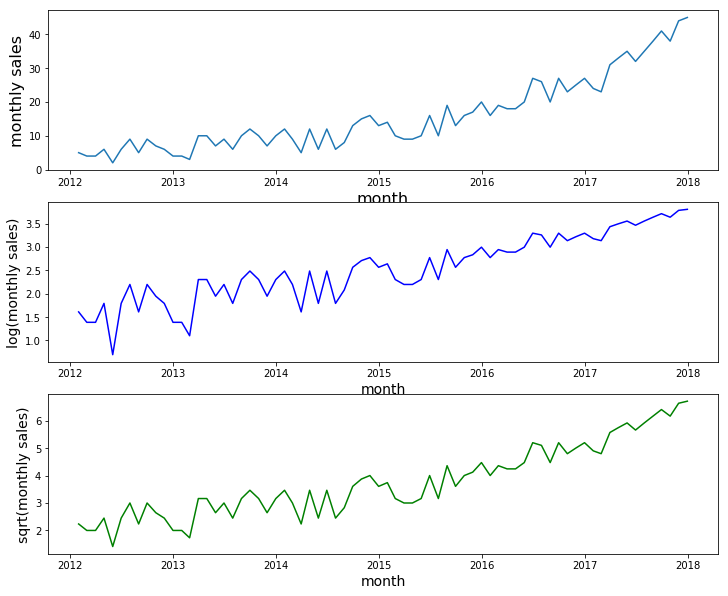

In [31]:
# data = 
fig = plt.figure(figsize=(12,10))


# No transformation
plt.subplot(3, 1, 1)
plt.plot(ts)
plt.xlabel("month", fontsize=16)
plt.ylabel("monthly sales", fontsize=16)

# Log transformation (linear and heteroscedastic)
plt.subplot(3, 1, 2)
plt.plot(pd.Series(np.log(ts), index=index), color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)

# Square root transformation 
plt.subplot(3, 1, 3)
plt.plot(pd.Series(np.sqrt(ts), index=index), color="green")
plt.xlabel("month", fontsize=14)
plt.ylabel("sqrt(monthly sales)", fontsize=14)


plt.show()

Goal is to make this more linear; you can tell it's still not stationary

## Subtract the Rolling Mean

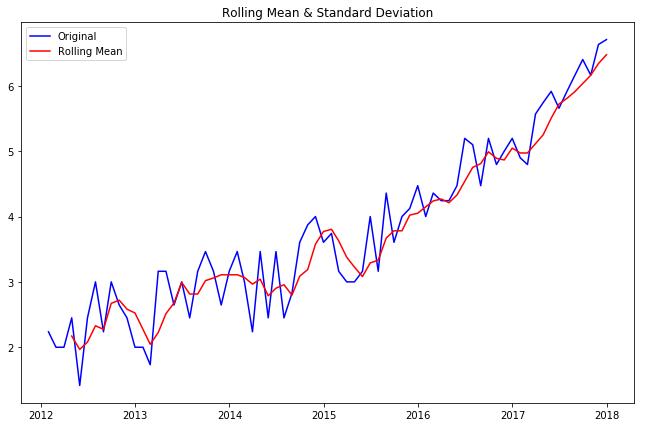

In [33]:
# Start with the square root transform
data_transform = pd.Series(np.sqrt(ts))

rolmean = data_transform.rolling(window = 4).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(data_transform, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [34]:
# Subtract the moving average from the original data and check head for Nans
data_minus_rolmean = data_transform - rolmean

In [35]:
# Drop the NaN values from timeseries calculated above 
# (the first few values didn't have a rolling mean)
data_minus_rolmean.dropna(inplace=True)

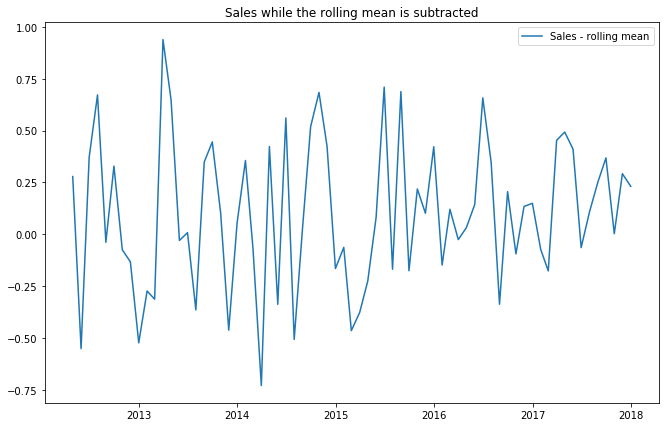

In [37]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

### Weighted Rolling Mean (Weighted Moving Average)

We can have the window to be adjusted for more complex situations (stock prices)

Popular one: **Exponentially Weighted Moving Average**
> weights are given using an exponential decay factor
> 
> `DataFrame.ewm()` (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html)

## Differencing

# Time Series Decomposition